In [1]:
# Block 1: Import Libraries and Initialize Reddit API
import praw
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from io import BytesIO
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

nltk.download('stopwords')

# Initialize Reddit API
reddit = praw.Reddit(
    client_id="RUdBseyl4eBxlRaQWPgKYA",
    client_secret="jz3MH5GDM7LnYIGnZlb7vICnglEuhw",
    user_agent="my-app by u/JPIERCE115"
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tktha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Block 2: Define Helper Functions
def extract_comment_data(comment):
    return {
        'id': comment.id,
        'author': comment.author.name if comment.author else "Deleted",
        'body': comment.body,
        'score': comment.score,
        'created_utc': comment.created_utc
    }

In [3]:
# Block 3: Extract Comments from Reddit
post_url = "https://www.reddit.com/r/pcmasterrace/comments/15tt6i7/am_i_the_only_one_who_thinks_the_nvidia_control/"
post_id = post_url.split('/')[-3]

# Get the post
post = reddit.submission(id=post_id)

# Fetch all comments
post.comments.replace_more(limit=None)
comments = post.comments.list()

# Extract data from comments
comments_data = [extract_comment_data(comment) for comment in comments]

# Create a DataFrame
comments_df = pd.DataFrame(comments_data)

# Convert the 'created_utc' to a readable datetime format
comments_df['created_utc'] = pd.to_datetime(comments_df['created_utc'], unit='s')


In [4]:
comments_df['created_month'] = comments_df['created_utc'].dt.strftime('%B')  # Month name
comments_df['created_year'] = comments_df['created_utc'].dt.year
comments_df['created_day'] = comments_df['created_utc'].dt.day

In [5]:
comments_df

,id,author,body,score,created_utc,created_month,created_year,created_day
0,jwo22vl,PCMRBot,Welcome everyone from r/all! Please remember:\...,1,2023-08-18 02:29:59,August,2023,18
1,jwlps06,Windy--,Still uses Windows XP icons lol,7886,2023-08-17 17:24:47,August,2023,17
2,jwlqb9w,Suspicious_Sandles,It's super outdated but I kinda prefer it to a...,6364,2023-08-17 17:27:53,August,2023,17
3,jwlm0h7,A5CH3NT3,Honestly I prefer the outdated control panel t...,1620,2023-08-17 17:02:32,August,2023,17
4,jwlto46,PinkamenaVTR2,"its old but its clear, everything you need on ...",2923,2023-08-17 17:47:42,August,2023,17
...,...,...,...,...,...,...,...,...
2932,jwnmfxw,Deleted,"Basically, if they integrated msi afterburner ...",1,2023-08-18 00:35:31,August,2023,18
2933,jwnpr52,batvinis,Make more presumptions as they're funny and ju...,2,2023-08-18 00:59:31,August,2023,18
2934,jwnrkp5,Deleted,Basically you can't afford to run the card the...,1,2023-08-18 01:12:35,August,2023,18
2935,jwnwq3t,batvinis,"Jeez, you must be such fun to hang around with...",2,2023-08-18 01:50:02,August,2023,18


In [6]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Define the preprocessing function
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    # Remove stop words
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)


# Preprocess the 'body' column and create a 'processed_body' column
comments_df['processed_body'] = comments_df['body'].apply(preprocess_text)

# Apply sentiment analysis to the 'processed_body' column
comments_df['sentiment'] = comments_df['processed_body'].apply(get_sentiment)


# Define sentiment classification function
def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Create 'sentiment_class' column
comments_df['sentiment_class'] = comments_df['sentiment'].apply(classify_sentiment)



# Display the DataFrame
comments_df.head(10)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tktha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tktha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tktha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,author,body,score,created_utc,created_month,created_year,created_day,processed_body,sentiment,sentiment_class
0,jwo22vl,PCMRBot,Welcome everyone from r/all! Please remember:\...,1,2023-08-18 02:29:59,August,2023,18,welcome everyone please remember 1 part pcmr e...,0.9893,positive
1,jwlps06,Windy--,Still uses Windows XP icons lol,7886,2023-08-17 17:24:47,August,2023,17,still us window xp icon lol,0.6597,positive
2,jwlqb9w,Suspicious_Sandles,It's super outdated but I kinda prefer it to a...,6364,2023-08-17 17:27:53,August,2023,17,super outdated kinda prefer clunky modern pric...,0.7506,positive
3,jwlm0h7,A5CH3NT3,Honestly I prefer the outdated control panel t...,1620,2023-08-17 17:02:32,August,2023,17,honestly prefer outdated control panel modern ...,0.1779,positive
4,jwlto46,PinkamenaVTR2,"its old but its clear, everything you need on ...",2923,2023-08-17 17:47:42,August,2023,17,old clear everything need left menu menu menu ...,0.6641,positive
5,jwlsik0,HankThrill69420,I'm gonna level with you\n\nIt brings me a wei...,856,2023-08-17 17:40:53,August,2023,17,gon na level brings weird comfort,0.2023,positive
6,jwltjf4,BloodyChapel,"It is, but I'm used to it, so don't touch it.",653,2023-08-17 17:46:55,August,2023,17,used touch,0.0000,neutral
7,jwm2esf,SmellAccomplished550,Are you one of those people that likes it when...,394,2023-08-17 18:39:27,August,2023,17,one people like aisle grocery store change,0.3612,positive
8,jwls95n,Tyfrthvnm,I had an 8800gt before on release year and it ...,90,2023-08-17 17:39:20,August,2023,17,8800gt release year already using ui,0.0000,neutral
9,jwlqx3i,toospie,"I don't care about the look if it is fast, it ...",174,2023-08-17 17:31:26,August,2023,17,care look fast though slow af real problem,0.1280,positive


In [7]:
comments_df['sentiment_class'].value_counts()



sentiment_class
positive    1480
negative     743
neutral      714
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

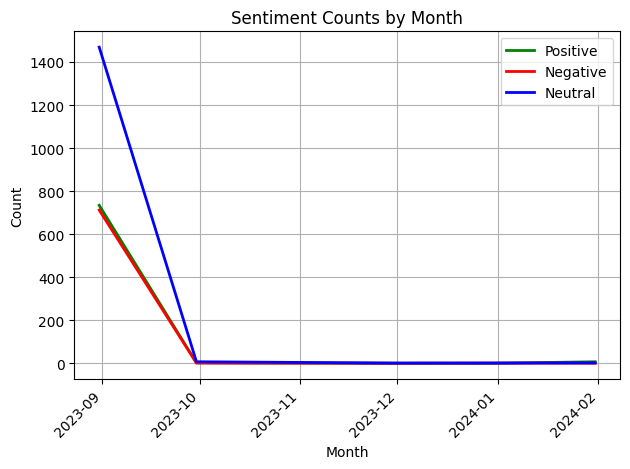

<Figure size 1200x600 with 0 Axes>

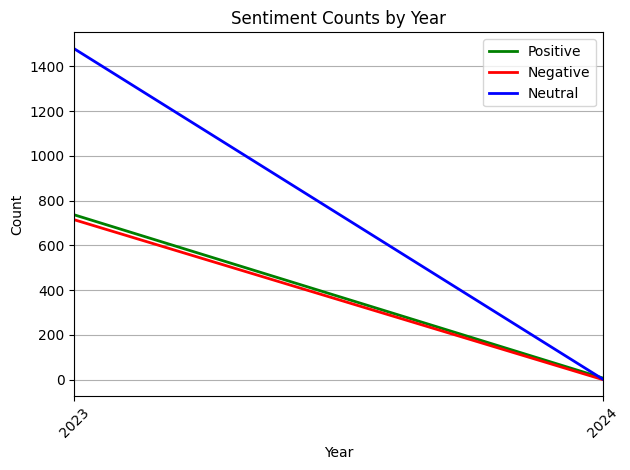

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame setup
# comments_df = pd.read_csv('path_to_your_data.csv')

# Ensure 'created_utc' is in datetime format
comments_df['created_utc'] = pd.to_datetime(comments_df['created_utc'])

# Set index to 'created_utc' for resampling
comments_df.set_index('created_utc', inplace=True)

def by_month(df):
    # Resample by month and count sentiments
    monthly_sentiment = df.groupby([pd.Grouper(freq='M'), 'sentiment_class']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(12, 6))
    monthly_sentiment.plot(kind='line', color=['green', 'red', 'blue'], linewidth=2)
    
    plt.title('Sentiment Counts by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(['Positive', 'Negative', 'Neutral'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def by_year(df):
    # Resample by year and count sentiments
    yearly_sentiment = df.groupby([pd.Grouper(freq='Y'), 'sentiment_class']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(12, 6))
    yearly_sentiment.plot(kind='line', color=['green', 'red', 'blue'], linewidth=2)
    
    plt.title('Sentiment Counts by Year')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(['Positive', 'Negative', 'Neutral'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the functions
by_month(comments_df)
by_year(comments_df)


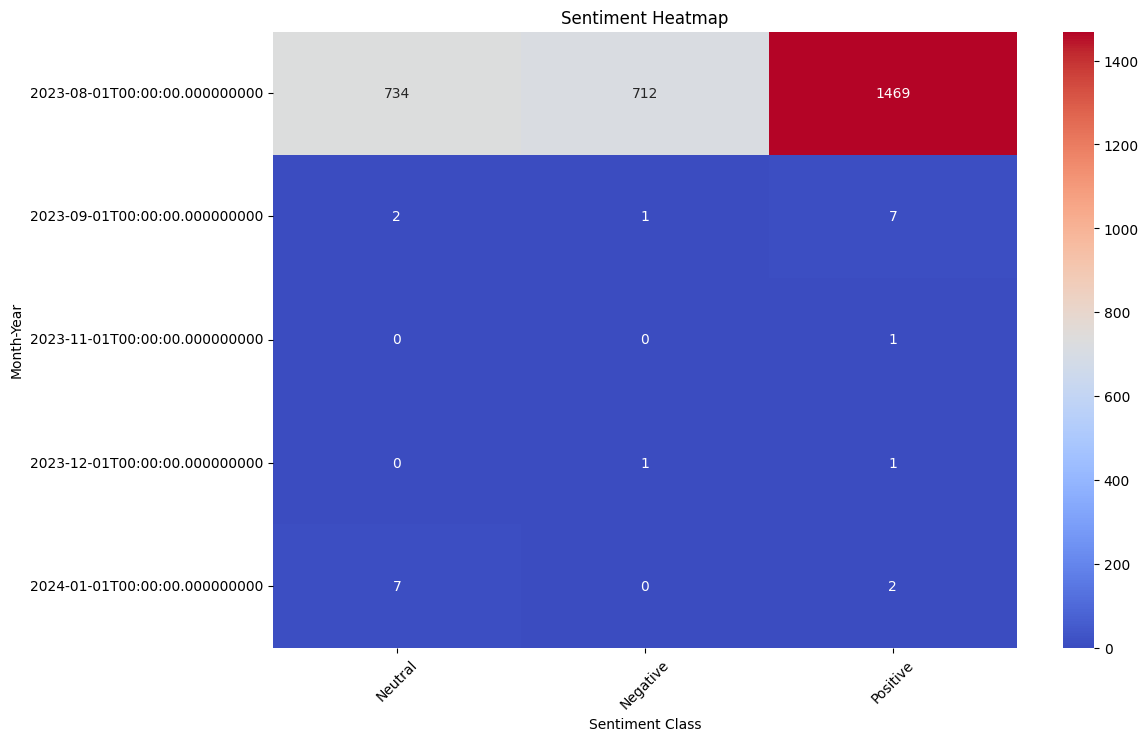

In [20]:
import seaborn as sns

def sentiment_heatmap(df):
    # Pivot table to get sentiment counts by month and year
    heatmap_data = df.pivot_table(index=df.index.to_period('M').to_timestamp(), 
                                 columns='sentiment_class', 
                                 aggfunc='size', 
                                 fill_value=0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
    
    plt.title('Sentiment Heatmap')
    plt.xlabel('Sentiment Class')
    plt.ylabel('Month-Year')
    plt.xticks(ticks=[0.5, 1.5, 2.5], labels=['Neutral', 'Negative', 'Positive'], rotation=45)
    plt.yticks(rotation=0)
    plt.show()

# Call the function
sentiment_heatmap(comments_df)


<Figure size 1200x600 with 0 Axes>

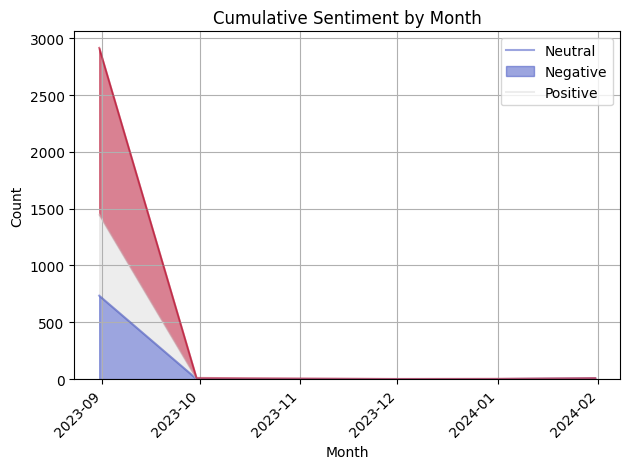

In [21]:
def sentiment_area_chart(df):
    # Resample by month and count sentiments
    monthly_sentiment = df.groupby([pd.Grouper(freq='M'), 'sentiment_class']).size().unstack(fill_value=0)
    
    plt.figure(figsize=(12, 6))
    monthly_sentiment.plot(kind='area', stacked=True, alpha=0.5, colormap='coolwarm')
    
    plt.title('Cumulative Sentiment by Month')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(['Neutral', 'Negative', 'Positive'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function
sentiment_area_chart(comments_df)
